In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                        cluster_std=0.60, random_state=0,
                        return_centers=True)

In [2]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids
def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])
def assign_labels(x,c):
   c = c[:,np.newaxis,:] # [N,1,2]
   dist2 = (x - c)**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   label = np.argmin(dist2,axis=0) # [npoints]
   return label

centroids unchanged as of step 2


Text(0.5, 1.0, 'step 2')

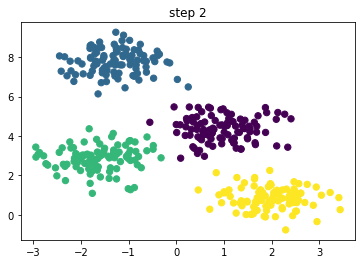

In [3]:
delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

for step in range(30):
   centroids = get_new_centroids(x,last_labels,N)
   labels = assign_labels(x,centroids)

   # test if centroids have stopped moving
   if np.all((last_centroids - centroids) < delta):
      print('centroids unchanged as of step %d' % step)
      break
   elif np.all(labels == last_labels):
      print('point labels unchanged as of step %d' % step)
      break
   else:
      last_labels = labels
      last_centroids = centroids

   plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
   plt.title('step %d' % step)
   plt.show()
   time.sleep(1)
   plt.close('all')
   ipydis.clear_output(wait=True)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)